# Objective

* Identify the Which Platform have more impact on Price 

* To build the Model which will help to Predict the future Price based on Different Platform 

In [1]:
################################## Data Analysis & Calculation ##################################

import pandas as pd 
import numpy as np 

################# Machine Learning ################
import statsmodels
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor

################# Data Visualization ################
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline


# Data Import

In [2]:
new = pd.read_excel(r"C:\Users\cheta\Desktop\python\Machine learning with python\Linear Regression\Car_engine_info.xlsx") #for an earlier version of Excel, you may need to use the file extension of 'xls'

new

,price,engine_s,horsepower,wheelbase,width,length,curb_wgt,fuel_cap,mpg
0,21.50,1.8,140,101.2,67.3,172.4,2.639,13.2,28.0
1,22.34,3.2,225,106.9,70.6,192.0,3.470,17.2,26.0
2,28.40,3.2,225,108.1,70.3,192.9,3.517,17.2,25.0
3,42.00,3.5,210,114.6,71.4,196.6,3.850,18.0,22.0
4,23.99,1.8,150,102.6,68.2,178.0,2.998,16.4,27.0
...,...,...,...,...,...,...,...,...,...
148,24.40,1.9,160,100.5,67.6,176.6,3.042,15.8,25.0
149,27.50,2.4,168,104.9,69.3,185.9,3.208,17.9,25.0
150,28.80,2.4,168,104.9,69.3,186.2,3.259,17.9,25.0
151,36.00,2.9,201,109.9,72.1,189.8,3.600,21.1,24.0


# Data Type 

In [3]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price       153 non-null    float64
 1   engine_s    153 non-null    float64
 2   horsepower  153 non-null    int64  
 3   wheelbase   153 non-null    float64
 4   width       153 non-null    float64
 5   length      153 non-null    float64
 6   curb_wgt    153 non-null    float64
 7   fuel_cap    153 non-null    float64
 8   mpg         153 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 10.9 KB


# Univariate Analysis

In [4]:
# Let's look at some statistical information about our dataframe.
new.describe() 

,price,engine_s,horsepower,wheelbase,width,length,curb_wgt,fuel_cap,mpg
count,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,27.299196,3.050327,185.071895,107.410458,71.085621,187.091503,3.376797,17.954248,23.855556
std,14.376826,1.046430,56.729054,7.692522,3.453477,13.432800,0.634540,3.925088,4.294165
min,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000
25%,17.890000,2.300000,148.000000,103.000000,68.400000,177.500000,2.967000,15.800000,21.000000
50%,22.695000,3.000000,175.000000,107.000000,70.400000,186.700000,3.340000,17.200000,24.000000
75%,31.930000,3.500000,215.000000,112.200000,73.100000,194.800000,3.821000,19.800000,26.000000
max,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000


# EDA
* Identify & Treatment of Outlier 

<AxesSubplot:>

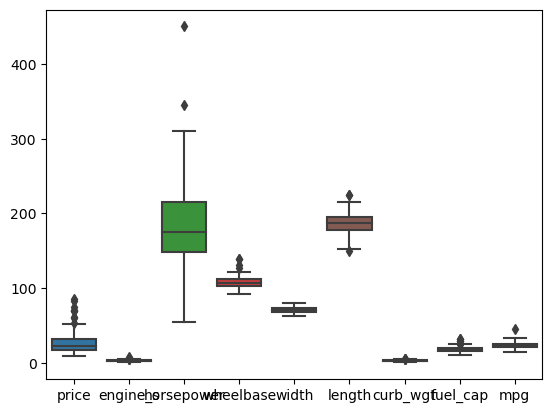

In [5]:
sns.boxplot(data=new)

### Treatment of Outlier -- Winsorizing Technique

In [6]:
for i in new:
    q1 = new[i].quantile(0.25)
    q3 = new[i].quantile(0.75)
    iqr = q3-q1 #Interquartile range
#low_limit = q1-1.5*iqr #acceptable range
    upper_limit = q3+1.5*iqr #acceptable range
    lower_limit = q1-1.5*iqr
    new[i]=np.where(new[i]>upper_limit,upper_limit,new[i])
    new[i]=np.where(new[i]<lower_limit,lower_limit,new[i])
    if type(i)==str:
        continue

<AxesSubplot:>

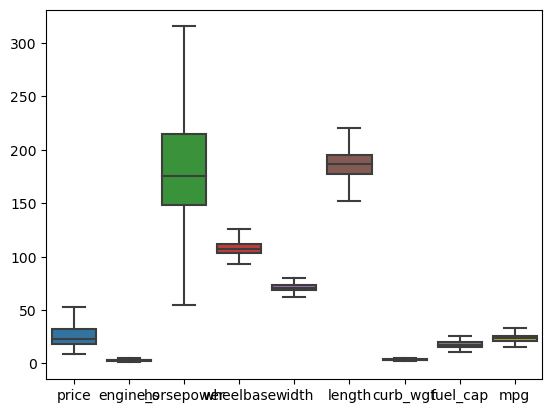

In [7]:
sns.boxplot(data=new)

### Missing Value

In [8]:
new.isna().sum()  # no missing data

price         0
engine_s      0
horsepower    0
wheelbase     0
width         0
length        0
curb_wgt      0
fuel_cap      0
mpg           0
dtype: int64

# Step 3 : Splitting the data in Training and Test set
* Using sklearn we split 70% of our data into training set and rest in test set.
* Setting random_state will give the same training and test set everytime on running the code

In [9]:
new.head()

,price,engine_s,horsepower,wheelbase,width,length,curb_wgt,fuel_cap,mpg
0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0
1,22.34,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0
2,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0
3,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0
4,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0


In [10]:
# Putting feature variable to X
X = new.drop('price', axis= 1)

# Putting response variable to y
y = new[['price']]

#random_state is the seed used by the random number generator. It can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,random_state=120)

In [11]:
df = pd.concat([y_train, X_train], axis=1)
df.head()

,price,engine_s,horsepower,wheelbase,width,length,curb_wgt,fuel_cap,mpg
3,42.000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0
109,31.598,4.3,190.0,107.0,67.8,181.2,4.068,17.5,19.0
104,26.399,3.3,170.0,112.2,74.9,194.8,3.991,20.0,21.0
149,27.500,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0
51,22.195,4.6,200.0,114.7,78.2,212.0,3.908,19.0,21.0


# Correlation Matrix

<AxesSubplot:title={'center':'price vs engine_s'}, xlabel='engine_s', ylabel='engine_s'>

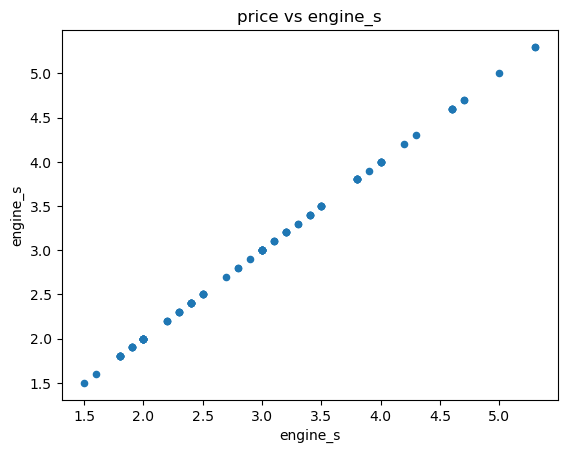

In [12]:
df.plot.scatter(x='engine_s', y='engine_s', title='price vs engine_s')

In [13]:
df.corr()

,price,engine_s,horsepower,wheelbase,width,length,curb_wgt,fuel_cap,mpg
price,1.000000,0.686121,0.876069,0.320781,0.404630,0.269608,0.658542,0.563456,-0.637737
engine_s,0.686121,1.000000,0.838204,0.537586,0.681072,0.595111,0.767376,0.682353,-0.761673
horsepower,0.876069,0.838204,1.000000,0.412337,0.523501,0.454744,0.660429,0.576477,-0.653500
wheelbase,0.320781,0.537586,0.412337,1.000000,0.676643,0.802950,0.686132,0.679788,-0.486303
width,0.404630,0.681072,0.523501,0.676643,1.000000,0.634371,0.669875,0.621397,-0.590467
length,0.269608,0.595111,0.454744,0.802950,0.634371,1.000000,0.641825,0.600269,-0.405989
curb_wgt,0.658542,0.767376,0.660429,0.686132,0.669875,0.641825,1.000000,0.867305,-0.844754
fuel_cap,0.563456,0.682353,0.576477,0.679788,0.621397,0.600269,0.867305,1.000000,-0.811872
mpg,-0.637737,-0.761673,-0.653500,-0.486303,-0.590467,-0.405989,-0.844754,-0.811872,1.000000


<AxesSubplot:>

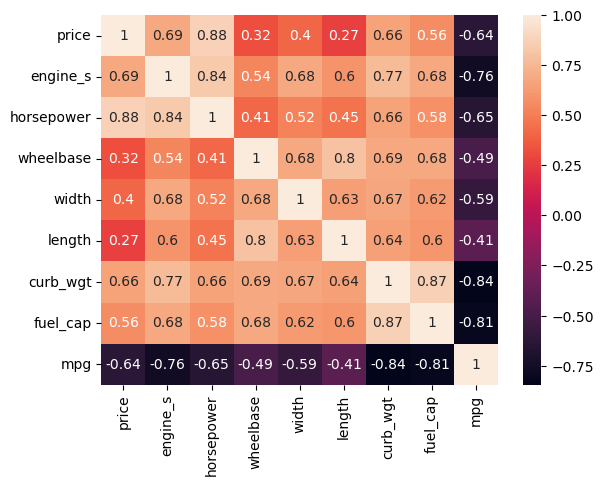

In [14]:
sns.heatmap(df.corr(),annot = True)

#### Horsepower have 88%  strong positve correlation with price

* horsepower have high impact on price
* There is no colinearity in data, So every platform is independent

### Multicolinearity (with the help of VIF)

In [15]:
X1 = df.drop(['price'],axis=1)
X1.columns

Index(['engine_s', 'horsepower', 'wheelbase', 'width', 'length', 'curb_wgt',
       'fuel_cap', 'mpg'],
      dtype='object')

In [16]:
X1=df.drop(['price','wheelbase','length','width','curb_wgt','engine_s','fuel_cap'],axis=1)
VIF = pd.Series([variance_inflation_factor(X1.values, i) # i = 0
                           for i in range(X1.shape[1])],  # i=0,1,2
                          index=X1.columns)  # column name
VIF

horsepower    6.960505
mpg           6.960505
dtype: float64

* No collinearity in the data, indicate no multi colinearity 

*  H0 :- There is no Linear relationship between price and engine_size, horsepower, wheelbase, width, length, curb_wgt, fuel_cap, mpg

                         Vs 

*  H1 :- There is Linear relationship between price and engine_size, horsepower, wheelbase, width, length, curb_wgt, fuel_cap, mpg

Alpha = 0.05 (5%)

# Method 1

In [17]:
import statsmodels.formula.api as smf
model = smf.ols('price ~ horsepower + mpg',data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     179.0
Date:                Tue, 07 Mar 2023   Prob (F-statistic):           2.10e-34
Time:                        11:36:03   Log-Likelihood:                -326.83
No. Observations:                 107   AIC:                             659.7
Df Residuals:                     104   BIC:                             667.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0896      6.099      0.343      0.733     -10.005      14.184
horsepower     0.1732      0.013     13.044      0.000       0.147       0.200
mpg           -0.3243      0.175     -1.852      0.067      -0.672       0.023
==============================================================================
Omnibus:                        9.028   Durbin-Watson:                   1.875
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                8.802
Skew:                           0.642   Prob(JB):                       0.0123
Kurtosis:                       3.570   Cond. No.                     2.30e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* There is Linear relationship between price and horsepower
* There is no Linear relationship between price and mpg 
 * so we will remove and re-run the model 
* 77% is accuracy of model , so we say model is good fit 

In [18]:
# removing the insignificant variable 
model2=smf.ols('price ~ horsepower',data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     346.6
Date:                Tue, 07 Mar 2023   Prob (F-statistic):           4.83e-35
Time:                        11:36:03   Log-Likelihood:                -328.56
No. Observations:                 107   AIC:                             661.1
Df Residuals:                     105   BIC:                             666.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.6479      1.918     -4.509      0.000     -12.451      -4.845
horsepower     0.1893      0.010     18.617      0.000       0.169       0.209
==============================================================================
Omnibus:                       14.038   Durbin-Watson:                   1.807
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.651
Skew:                           0.739   Prob(JB):                     0.000242
Kurtosis:                       4.246   Cond. No.                         711.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* There is Linear relationship between price and horsepower
* 77% is accuracy of model , so we say model is good fit 
* Y = -8.6479 + 0.1893 * horsepower

# Assumption of Model

* Linearity
* Normality
* Homoscedasicity
* Model Error has to be independently identificaly Distibuted

In [19]:
df.head()

,price,engine_s,horsepower,wheelbase,width,length,curb_wgt,fuel_cap,mpg
3,42.000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0
109,31.598,4.3,190.0,107.0,67.8,181.2,4.068,17.5,19.0
104,26.399,3.3,170.0,112.2,74.9,194.8,3.991,20.0,21.0
149,27.500,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0
51,22.195,4.6,200.0,114.7,78.2,212.0,3.908,19.0,21.0


In [20]:
# Y = intercet + b1 * Tv + b2 * radio
Y = -8.6479 + 0.1893 * 210
Y

31.1051

In [21]:
df['fitted_value']=model2.fittedvalues #Predicted Value
df['residual']=model2.resid  #Error
df.head()

,price,engine_s,horsepower,wheelbase,width,length,curb_wgt,fuel_cap,mpg,fitted_value,residual
3,42.000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,31.095958,10.904042
109,31.598,4.3,190.0,107.0,67.8,181.2,4.068,17.5,19.0,27.310830,4.287170
104,26.399,3.3,170.0,112.2,74.9,194.8,3.991,20.0,21.0,23.525701,2.873299
149,27.500,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,23.147189,4.352811
51,22.195,4.6,200.0,114.7,78.2,212.0,3.908,19.0,21.0,29.203394,-7.008394


# Linearity

<AxesSubplot:title={'center':'price vs horsepower'}, xlabel='horsepower', ylabel='price'>

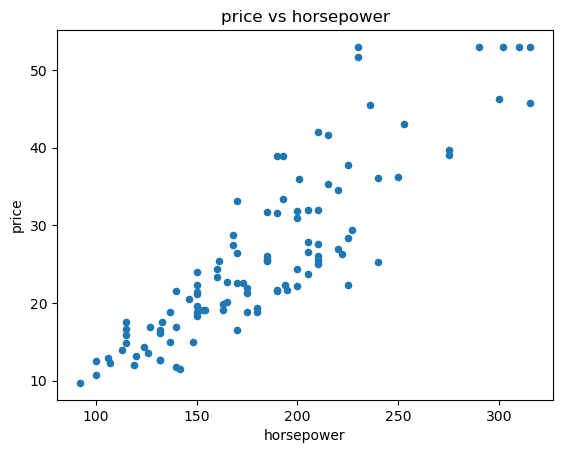

In [22]:
df.plot.scatter(x='horsepower', y='price', title='price vs horsepower')

# Homoscedisicity

<AxesSubplot:xlabel='fitted_value', ylabel='residual'>

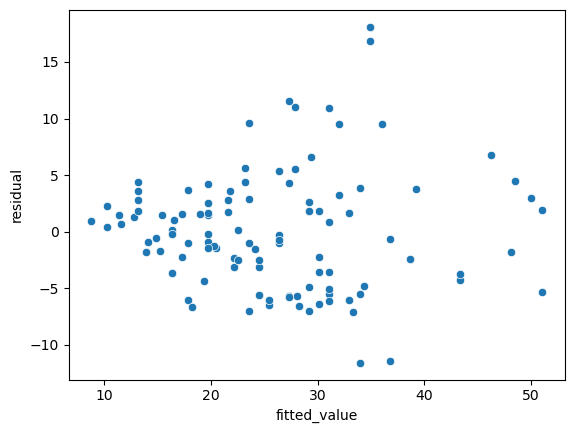

In [23]:
sns.scatterplot(x='fitted_value', y='residual',data=df)

# Normality

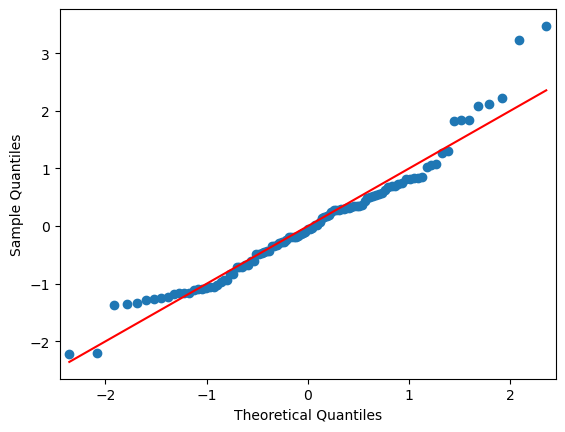

In [24]:
import statsmodels.api as sm
fig = sm.qqplot(df['residual'], fit=True, line='s') # s indicate standardized line
plt.show()

# Model Error are IID 

<AxesSubplot:ylabel='Frequency'>

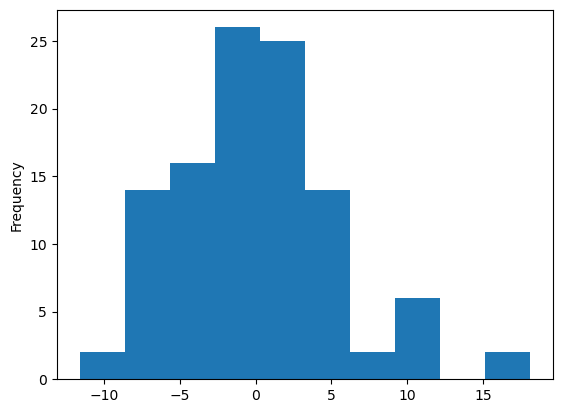

In [25]:
df['residual'].plot.hist()

# Prediction on Test Data (unseen data)

In [26]:
df_test=pd.concat([X_test,y_test],axis=1)

df_test.head()

,engine_s,horsepower,wheelbase,width,length,curb_wgt,fuel_cap,mpg,price
114,2.4,150.0,104.1,68.4,181.9,2.906,15.0,27.0,21.610
55,2.3,135.0,106.9,70.3,188.8,2.932,17.1,27.0,15.350
122,3.4,300.0,92.6,69.5,174.5,3.075,17.0,23.0,52.990
82,5.0,302.0,99.0,71.3,177.1,4.125,21.1,20.0,52.990
67,3.0,210.0,105.1,70.5,190.2,3.373,18.5,23.0,31.505


In [27]:
df_test['Prediction']=model2.predict(df_test) # predict = all row prediction ( Auto )
df_test.head()

,engine_s,horsepower,wheelbase,width,length,curb_wgt,fuel_cap,mpg,price,Prediction
114,2.4,150.0,104.1,68.4,181.9,2.906,15.0,27.0,21.610,19.740573
55,2.3,135.0,106.9,70.3,188.8,2.932,17.1,27.0,15.350,16.901727
122,3.4,300.0,92.6,69.5,174.5,3.075,17.0,23.0,52.990,48.129037
82,5.0,302.0,99.0,71.3,177.1,4.125,21.1,20.0,52.990,48.507549
67,3.0,210.0,105.1,70.5,190.2,3.373,18.5,23.0,31.505,31.095958


In [28]:
Y = -8.6479 + 0.1893 * 135
Y

16.9076

# Test


In [29]:
from sklearn.metrics import r2_score
r2 = r2_score(df_test.price, df_test.Prediction)
print('R2 score for model Performance on Test', np.round(r2,2))

R2 score for model Performance on Test 0.73


# Train

In [30]:
from sklearn.metrics import r2_score
r2 = r2_score(df.price, df.fitted_value)
print('R2 score for model Performance on Test', np.round(r2,2))

R2 score for model Performance on Test 0.77


* Model is good fit on Train dataset  & Performance of model on Test data is also good fit

# Loss Function - RMSE

In [31]:
import math
from sklearn.metrics import mean_squared_error
# calculate the mean squared error
model_mse = mean_squared_error(df['price'], df['fitted_value'])
model_rmse = math.sqrt(model_mse)
print("RMSE {:.3}".format(model_rmse))

RMSE 5.22


In [32]:
import math
from sklearn.metrics import mean_squared_error
# calculate the mean squared error
model_mse = mean_squared_error(df_test['price'], df_test['Prediction'])
model_rmse = math.sqrt(model_mse)
print("RMSE {:.3}".format(model_rmse))

RMSE 6.54


# Finish